<a href="https://colab.research.google.com/github/ZishanSayyed/Dog-Cat-Prediction-Using-CNN/blob/main/Dog_Cat_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog Cat Detection Model Using CNN 

In [1]:
#importing Models 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import os
os.environ["KAGGLE_USERNAME"]="zishansayyed"
os.environ["KAGGLE_KEY"]="9fe5d1f8d4a59417713436d574b6242b"


In [3]:
! kaggle datasets download -d arpitjain007/dog-vs-cat-fastai


 99% 1.59G/1.60G [00:17<00:00, 78.6MB/s]
100% 1.60G/1.60G [00:17<00:00, 99.8MB/s]


In [ ]:
! unzip dog-vs-cat-fastai.zip

In [5]:
main_dir="/content/dogscats"

test_dir=os.path.join(main_dir,"test1")
train_dir=os.path.join(main_dir,"train")
valid_dir=os.path.join(main_dir,"valid")

train_dog_dir=os.path.join(train_dir,"dogs")
train_cat_dir=os.path.join(train_dir,"cats")

In [6]:
train_cat_img=os.listdir(train_cat_dir)
print(train_cat_img[:10])

train_dog_img=os.listdir(train_dog_dir)
print(train_dog_img[:10])


['cat.12488.jpg', 'cat.12097.jpg', 'cat.9583.jpg', 'cat.5708.jpg', 'cat.1872.jpg', 'cat.8957.jpg', 'cat.11539.jpg', 'cat.2669.jpg', 'cat.11997.jpg', 'cat.2951.jpg']
['dog.4885.jpg', 'dog.11307.jpg', 'dog.4302.jpg', 'dog.8672.jpg', 'dog.9712.jpg', 'dog.9988.jpg', 'dog.488.jpg', 'dog.6050.jpg', 'dog.3347.jpg', 'dog.6298.jpg']


In [7]:
import matplotlib.image as mimg
nrows=5
ncols=5
plt.figure(figsize=(30,30))

cat_pic=[]
for i in train_cat_img[0:13]:
  cat_pic.append(os.path.join(train_cat_dir,i))

dog_pic=[]
for i in train_dog_img[0:12]:
  dog_pic.append(os.path.join(train_dog_dir,i))


<Figure size 2160x2160 with 0 Axes>

In [8]:
print(cat_pic)
print(dog_pic)

['/content/dogscats/train/cats/cat.12488.jpg', '/content/dogscats/train/cats/cat.12097.jpg', '/content/dogscats/train/cats/cat.9583.jpg', '/content/dogscats/train/cats/cat.5708.jpg', '/content/dogscats/train/cats/cat.1872.jpg', '/content/dogscats/train/cats/cat.8957.jpg', '/content/dogscats/train/cats/cat.11539.jpg', '/content/dogscats/train/cats/cat.2669.jpg', '/content/dogscats/train/cats/cat.11997.jpg', '/content/dogscats/train/cats/cat.2951.jpg', '/content/dogscats/train/cats/cat.4337.jpg', '/content/dogscats/train/cats/cat.7602.jpg', '/content/dogscats/train/cats/cat.3840.jpg']
['/content/dogscats/train/dogs/dog.4885.jpg', '/content/dogscats/train/dogs/dog.11307.jpg', '/content/dogscats/train/dogs/dog.4302.jpg', '/content/dogscats/train/dogs/dog.8672.jpg', '/content/dogscats/train/dogs/dog.9712.jpg', '/content/dogscats/train/dogs/dog.9988.jpg', '/content/dogscats/train/dogs/dog.488.jpg', '/content/dogscats/train/dogs/dog.6050.jpg', '/content/dogscats/train/dogs/dog.3347.jpg', '/co

In [9]:
pics=cat_pic+dog_pic

In [10]:
print(pics)
print(len(pics))

['/content/dogscats/train/cats/cat.12488.jpg', '/content/dogscats/train/cats/cat.12097.jpg', '/content/dogscats/train/cats/cat.9583.jpg', '/content/dogscats/train/cats/cat.5708.jpg', '/content/dogscats/train/cats/cat.1872.jpg', '/content/dogscats/train/cats/cat.8957.jpg', '/content/dogscats/train/cats/cat.11539.jpg', '/content/dogscats/train/cats/cat.2669.jpg', '/content/dogscats/train/cats/cat.11997.jpg', '/content/dogscats/train/cats/cat.2951.jpg', '/content/dogscats/train/cats/cat.4337.jpg', '/content/dogscats/train/cats/cat.7602.jpg', '/content/dogscats/train/cats/cat.3840.jpg', '/content/dogscats/train/dogs/dog.4885.jpg', '/content/dogscats/train/dogs/dog.11307.jpg', '/content/dogscats/train/dogs/dog.4302.jpg', '/content/dogscats/train/dogs/dog.8672.jpg', '/content/dogscats/train/dogs/dog.9712.jpg', '/content/dogscats/train/dogs/dog.9988.jpg', '/content/dogscats/train/dogs/dog.488.jpg', '/content/dogscats/train/dogs/dog.6050.jpg', '/content/dogscats/train/dogs/dog.3347.jpg', '/con

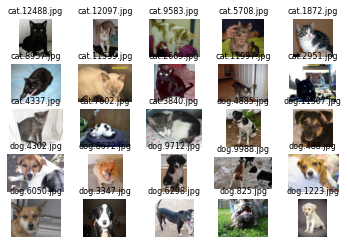

In [11]:
for i in range(0,len(pics)):
  data=pics[i].split("/",5)[5]
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis("off")
  image=mimg.imread(pics[i])
  sp.set_title(data,fontsize=8)
  plt.imshow(image,cmap="gray")

plt.show()

In [12]:
train_dgen=ImageDataGenerator(rescale=1./255,
                              zoom_range=0.2,
                              rotation_range=50,
                              horizontal_flip=True)
test_dgen=ImageDataGenerator(rescale=1/255)
valid_dgen=ImageDataGenerator(rescale=1/255)

In [13]:
train_gen=train_dgen.flow_from_directory(train_dir,
                                         target_size=(150,150),
                                         batch_size=32,
                                         class_mode="binary")

Found 23000 images belonging to 2 classes.


In [14]:
valid_gen=valid_dgen.flow_from_directory(valid_dir,
                                         target_size=(150,150),
                                         batch_size=32,
                                         class_mode="binary")

Found 2000 images belonging to 2 classes.


In [15]:
train_gen.class_indices
train_gen.image_shape

(150, 150, 3)

In [ ]:
#performing CNN and Building modle

model=Sequential()
#adding 1st layer
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from tensorflow import optimizers

model.compile(loss="binary_crossentropy",
              optimizer=optimizers.RMSprop(0.0001),
              metrics=["accuracy"])

In [ ]:
trainning=model.fit(train_gen,
                    epochs=5,
                    validation_data=valid_gen)

Epoch 1/5
719/719 [==============================] - 1147s 2s/step - loss: 0.6069 - accuracy: 0.6647 - val_loss: 0.5305 - val_accuracy: 0.7440
Epoch 2/5
719/719 [==============================] - 1148s 2s/step - loss: 0.5501 - accuracy: 0.7195 - val_loss: 0.4979 - val_accuracy: 0.7575
Epoch 3/5
719/719 [==============================] - 1142s 2s/step - loss: 0.5177 - accuracy: 0.7436 - val_loss: 0.4742 - val_accuracy: 0.7780
Epoch 4/5
719/719 [==============================] - 1141s 2s/step - loss: 0.4875 - accuracy: 0.7660 - val_loss: 0.4580 - val_accuracy: 0.7880
Epoch 5/5
719/719 [==============================] - 1139s 2s/step - loss: 0.4637 - accuracy: 0.7804 - val_loss: 0.4106 - val_accuracy: 0.8130


In [ ]:
model.save("detection_model.h5")

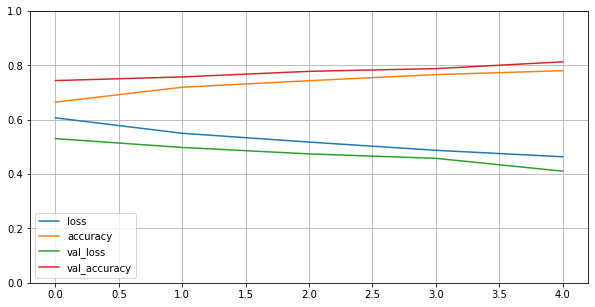

In [ ]:
pd.DataFrame(trainning.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
#running model on test data

test_loss ,test_acc=model.evaluate(valid_gen)

63/63 [==============================] - 28s 440ms/step - loss: 0.4106 - accuracy: 0.8130


In [16]:
##to increse model performacne more we use VGG16

In [17]:
#to increse model performacne more we use VGG16
from tensorflow.keras.applications import VGG16
con_base=VGG16(weights="imagenet",
              include_top=False,
              input_shape=(150,150,3))

58892288/58889256 [==============================] - 0s 0us/step


In [19]:
con_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [22]:
model2=Sequential()
model2.add(con_base)
model2.add(Flatten())
model2.add(Dense(512,activation="relu"))
model2.add(Dense(1,activation="sigmoid"))

In [23]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 18,910,017
Trainable params: 18,910,017
Non-trainable params: 0
_________________________________________________________________


In [26]:
from tensorflow.keras import optimizers
model2.compile(loss="binary_crossentropy",
             optimizer=optimizers.RMSprop(0.0001),
              metrics =['accuracy'])

In [28]:
from tensorflow import keras
checkpoint_cp=keras.callbacks.ModelCheckpoint("Dog_Vs_Cat_model-(epoch:02d).h5")


In [30]:
model_FIT2= model2.fit_generator(
          train_gen,
          steps_per_epoch=100,
          epochs=20,
          validation_data=valid_gen,
          validation_steps=50,
          callbacks=[checkpoint_cp])


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 37s 374ms/step - loss: 0.7210 - accuracy: 0.5934 - val_loss: 0.5637 - val_accuracy: 0.7200
Epoch 2/20
100/100 [==============================] - 37s 374ms/step - loss: 0.5191 - accuracy: 0.7534 - val_loss: 0.3248 - val_accuracy: 0.8556
Epoch 3/20
100/100 [==============================] - 38s 376ms/step - loss: 0.3854 - accuracy: 0.8219 - val_loss: 0.5268 - val_accuracy: 0.7763
Epoch 4/20
100/100 [==============================] - 39s 392ms/step - loss: 0.3433 - accuracy: 0.8518 - val_loss: 0.2289 - val_accuracy: 0.9031
Epoch 5/20
100/100 [==============================] - 38s 377ms/step - loss: 0.3010 - accuracy: 0.8722 - val_loss: 0.3673 - val_accuracy: 0.8619
Epoch 6/20
100/100 [==============================] - 38s 376ms/step - loss: 0.2697 - accuracy: 0.8903 - val_loss: 0.4093 - val_accuracy: 0.8069
Epoch 7/20
100/100 [==============================] - 

In [31]:
print(train_gen.class_indices)

{'cats': 0, 'dogs': 1}


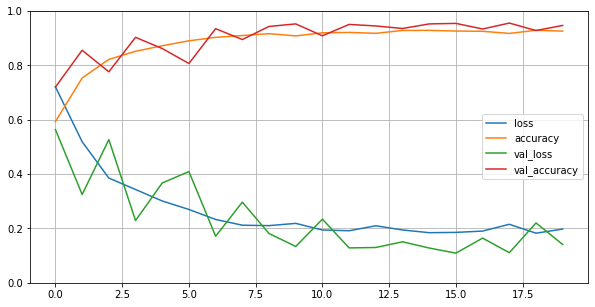

In [33]:
pd.DataFrame(model_FIT2.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [39]:
#now seeing how model works by providing data which was not present prviously
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()
for fname in uploaded.keys():
  img_path="/content/"+fname
  img= image.load_img(img_path , target_size=(150,150))
  images=image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction=model2.predict(images)
  print(fname)
  if prediction==0:
    print("Cat")

  else:
    print("dog")

Saving cat.1503.jpg to cat.1503.jpg
Saving cat.1504.jpg to cat.1504.jpg
Saving cat.1505.jpg to cat.1505.jpg
Saving dog.1513.jpg to dog.1513.jpg
Saving dog.1514.jpg to dog.1514.jpg
Saving dog.1515.jpg to dog.1515.jpg
cat.1503.jpg
Cat
cat.1504.jpg
dog
cat.1505.jpg
dog
dog.1513.jpg
dog
dog.1514.jpg
dog
dog.1515.jpg
dog


In [40]:
#End